<a href="https://colab.research.google.com/github/Gaukhar-ai/working-in-pairs/blob/master/Random_Forest_apps_google_play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Day 30 Lecture 2 Assignment

In this assignment, we will learn about random forests. We will use the google play store dataset loaded below.

In [1]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    f1_score,
    make_scorer)


In [2]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In this assignment, you will work more independently. Perform the following steps:
    
1. Select which columns are best suited to predict whether the rating is above 4.5
2. Process the data (including transforming to the correct column type, removing missing values, creating dummy variables, and removing irrelevant variables)
3. Create a random forest model and evaluate
4. Using grid search cross validation, tweak the parameters to produce a better performing model
5. Show and discuss your results

Good luck!

In [3]:
reviews['above'] = reviews['Rating']>4.5
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,above
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,True
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,False


In [4]:
cat_counts = reviews['Category'].value_counts()
keep = cat_counts[cat_counts > 100].index
reviews = reviews[reviews['Category'].isin(keep)]

In [5]:
cont_count = reviews['Content Rating'].value_counts()
keep = cont_count[cont_count > 4.5].index
reviews = reviews[reviews['Content Rating'].isin(keep)]

In [6]:
reviews = pd.get_dummies(reviews, columns = ['above', 'Type', 'Content Rating', 'Category'], drop_first = True)

In [7]:
pd.set_option('display.max_columns', None)

In [9]:
reviews = reviews.drop(
    columns = ['App',
               'Rating',
               'Size',
               'Price',
               'Last Updated',
               'Current Ver',
               'Android Ver',
               'Genres'

               
    ]
)

In [10]:
reviews.head()

,Reviews,Installs,above_True,Type_Paid,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Category_BUSINESS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS
139,2914724,"100,000,000+",1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140,1857,"50,000+",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
141,4478,"100,000+",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142,577550,"10,000,000+",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143,814080,"100,000,000+",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
reviews.shape

(10195, 30)

In [12]:
reviews['Installs'] = reviews['Installs'].str.replace('+', '')
reviews['Installs'] = reviews['Installs'].str.replace(',', '')
reviews['Installs'] = reviews['Installs'].astype(int)

In [13]:
reviews['Reviews'] = reviews['Reviews'].astype(int)

In [14]:
reviews.dtypes

Reviews                         int64
Installs                        int64
above_True                      uint8
Type_Paid                       uint8
Content Rating_Everyone 10+     uint8
Content Rating_Mature 17+       uint8
Content Rating_Teen             uint8
Category_BUSINESS               uint8
Category_COMMUNICATION          uint8
Category_DATING                 uint8
Category_EDUCATION              uint8
Category_ENTERTAINMENT          uint8
Category_FAMILY                 uint8
Category_FINANCE                uint8
Category_FOOD_AND_DRINK         uint8
Category_GAME                   uint8
Category_HEALTH_AND_FITNESS     uint8
Category_LIFESTYLE              uint8
Category_MAPS_AND_NAVIGATION    uint8
Category_MEDICAL                uint8
Category_NEWS_AND_MAGAZINES     uint8
Category_PERSONALIZATION        uint8
Category_PHOTOGRAPHY            uint8
Category_PRODUCTIVITY           uint8
Category_SHOPPING               uint8
Category_SOCIAL                 uint8
Category_SPO

In [15]:
reviews = reviews.dropna()

In [16]:
X = reviews.drop(columns = ['above_True'])
y = reviews['above_True']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

In [17]:
model = RandomForestClassifier(max_depth = 5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'train_core: {train_score}')
print(f'test_score: {test_score}')

train_core: 0.823320255026974
test_score: 0.8327611574301128


In [26]:
grid = {
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 150, 200, 300],
    'criterion': ['gini', 'entropy'],
}

model = GridSearchCV(
    RandomForestClassifier(), 
    param_grid = grid,

#if i don't care about acuracy, can have different CV 

   scoring = make_scorer(roc_auc_score),
#scoring=make_scorer(f1_score)

    cv = 3,
    verbose = 1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   55.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [27]:
model.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

In [28]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


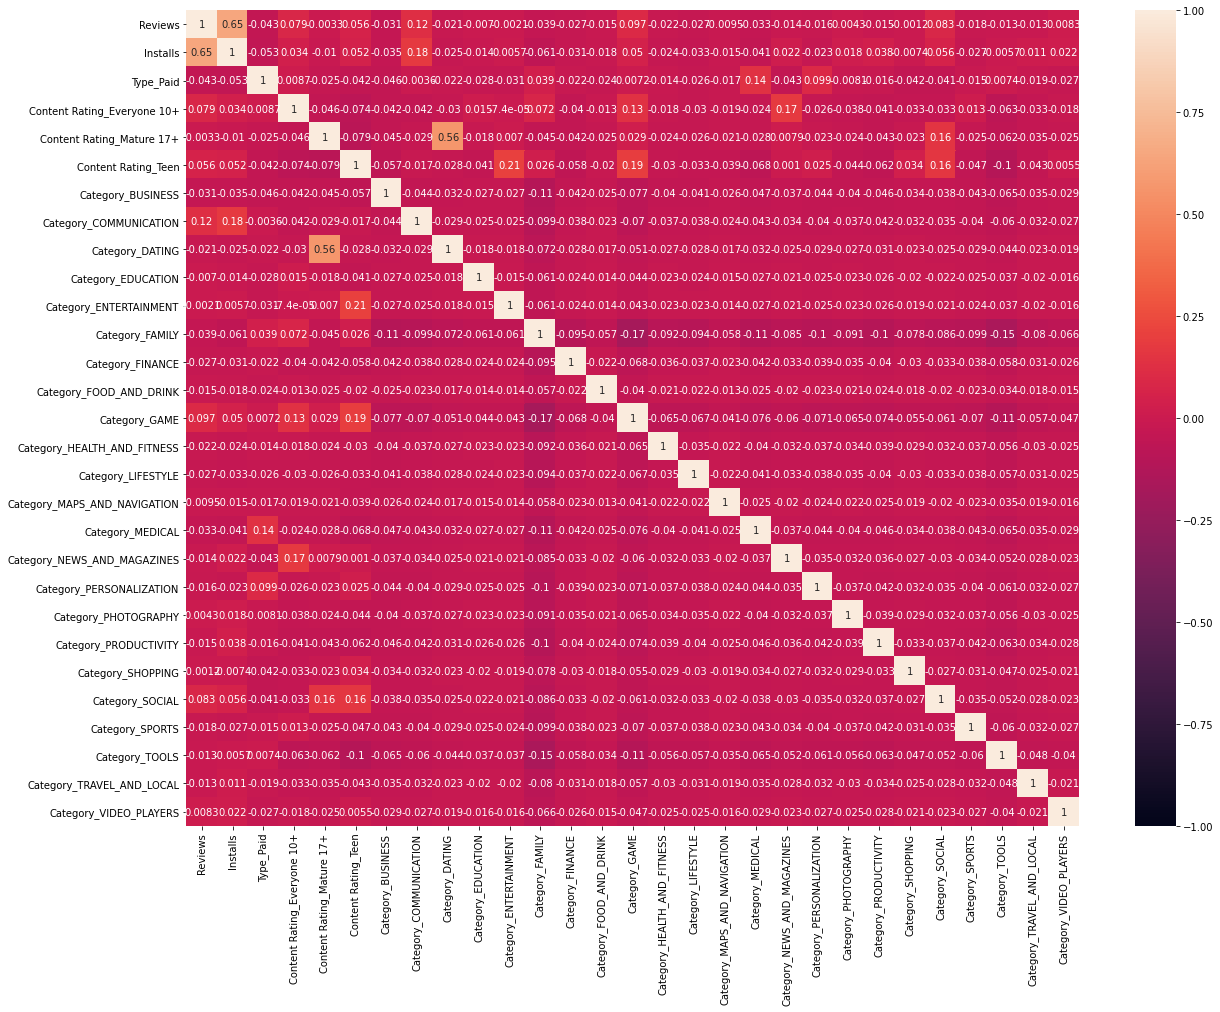

In [33]:
plt.figure(figsize=(20, 15))
sns.heatmap(X_train.corr(), annot=True, vmin=-1, vmax=1)
plt.show()